In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [7]:
y = np.array([1, 2, 2, 3, 5, 2])
y_pred = np.array([5, 2, 2, 5, 7, 1000])

print('MAE :', mean_absolute_error(y, y_pred))
print('RMSE :', np.sqrt(mean_squared_error(y, y_pred)))
print('median abs err :', median_absolute_error(y, y_pred))

MAE : 167.66666666666666
RMSE : 407.43670265044443
median abs err : 2.0


La MSE penalise beaucoup plus les grandes erreurs que la MAE
Donc:
    MSE -> on accorde une grande importance aux grandes erreurs
    MAE -> l'importance d'une erreur est lineaire avec son amplitude. Si le Dataset contient des valeurs aberrantes (outliers)

In [8]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
X = boston.data
y = boston.target

In [14]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

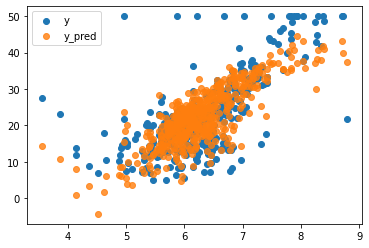

In [15]:
plt.scatter(X[:,5], y, label='y')
plt.scatter(X[:,5], y_pred, alpha=0.8, label='y_pred')
plt.legend()

(array([78., 57., 47., 31., 53., 35., 32., 31., 29., 22., 16., 15., 15.,
         5.,  6.,  5.,  2.,  2.,  2.,  4.,  1.,  3.,  0.,  1.,  4.,  2.,
         1.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([1.74154101e-03, 5.25692130e-01, 1.04964272e+00, 1.57359331e+00,
        2.09754390e+00, 2.62149448e+00, 3.14544507e+00, 3.66939566e+00,
        4.19334625e+00, 4.71729684e+00, 5.24124743e+00, 5.76519802e+00,
        6.28914861e+00, 6.81309919e+00, 7.33704978e+00, 7.86100037e+00,
        8.38495096e+00, 8.90890155e+00, 9.43285214e+00, 9.95680273e+00,
        1.04807533e+01, 1.10047039e+01, 1.15286545e+01, 1.20526051e+01,
        1.25765557e+01, 1.31005063e+01, 1.36244568e+01, 1.41484074e+01,
        1.46723580e+01, 1.51963086e+01, 1.57202592e+01, 1.62442098e+01,
        1.67681604e+01, 1.72921110e+01, 1.78160616e+01, 1.83400121e+01,
        1.88639627e+01, 1.93879133e+01, 1.99118639e+01, 2.04358145e+

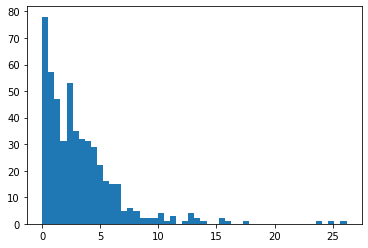

In [17]:
err_hist = np.abs(y - y_pred)
plt.hist(err_hist, bins=50)

R2: 1 - erreurs/variance

R2 proche de 1: erreur << variance

R2 = 0: erreur = variance

R2 < 0: erreur > variance

In [19]:
model.score(X, y) #R2 !

0.7406426641094094

In [21]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(LinearRegression(), X, y, cv=3,
               scoring='neg_mean_absolute_error')

array([ -3.32352337,  -4.27948547, -13.47752829])